In [0]:
! pip install spotipy
import spotipy
import spotipy.util as util
import pandas as pd # for later
import numpy as np

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = 'bececbd52aed4495a36e543a6c51333f'
secret = 'e373c7be1cb84420a732b016d7a8f878'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)



In [0]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist", "album", "track_name", "track_id", 
                             "danceability", "energy", "key", "loudness", "mode", "speechiness",
                             "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Create empty dict
    playlist_features = {}
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [0]:
playlist_data = analyze_playlist("katdawg17", "2BpInSu6ZRaMwK4G3pUdWr")
df = pd.DataFrame(playlist_data)
df

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Various Artists,Christmas Music 100 Hits,Thank God It's Christmas,5Q0fzKZDT6iDTlENsrJ3OV,0.284,0.417,7,-8.795,1,0.0287,0,0.2420,0.313,71.993,257360,4
1,Various Artists,Christmas Music 100 Hits,The Christmas Song (Chestnuts Roasting on an O...,3ceMwoo0pppZwVozHMgoHe,0.298,0.214,1,-14.909,1,0.0438,0,0.1050,0.172,64.830,194867,4
2,Various Artists,Christmas Music 100 Hits,White Christmas,6kGF1dhIK1uGhcrWeuLLMv,0.236,0.222,9,-13.806,1,0.0310,0.00294,0.3920,0.239,93.041,182427,4
3,Various Artists,Christmas Music 100 Hits,Jingle Bells,51d4dfkP8umQRkHz49Y4aJ,0.539,0.495,4,-9.388,1,0.0280,0,0.2890,0.890,142.303,137547,4
4,Various Artists,Christmas Music 100 Hits,Do They Know It's Christmas?,6Z7nSvnAhMasviVPmdEZKC,0.591,0.708,0,-5.377,1,0.0398,0.000113,0.0993,0.360,115.111,229453,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Various Artists,Christmas Music 100 Hits,Let's Make Christmas Mean Something This Year,0hsMwcV2Q5xO3hJ2UsH3sJ,0.321,0.462,5,-7.776,1,0.0413,0,0.1150,0.421,174.389,388600,3
96,Various Artists,Christmas Music 100 Hits,Children's Christmas Song,49Vvf7gMVlrsHf0Yu5wfuL,0.633,0.700,10,-10.909,1,0.0479,0,0.0727,0.752,115.404,173533,4
97,Various Artists,Christmas Music 100 Hits,What Child Is This?,5HvRUoXHa7qMLBlVSMEXH6,0.291,0.211,8,-10.774,0,0.0323,0,0.1010,0.179,180.934,245360,3
98,Various Artists,Christmas Music 100 Hits,It's Christmas Time,11sA4IjcCId56mTfpsiodT,0.637,0.710,5,-4.957,1,0.0337,0.00157,0.1340,0.306,94.997,224947,4


In [0]:
df.insert(0, 'New_ID', range(880, 880 + len(df)))
df

,New_ID,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,880,Various Artists,Christmas Music 100 Hits,Thank God It's Christmas,5Q0fzKZDT6iDTlENsrJ3OV,0.284,0.417,7,-8.795,1,0.0287,0,0.2420,0.313,71.993,257360,4
1,881,Various Artists,Christmas Music 100 Hits,The Christmas Song (Chestnuts Roasting on an O...,3ceMwoo0pppZwVozHMgoHe,0.298,0.214,1,-14.909,1,0.0438,0,0.1050,0.172,64.830,194867,4
2,882,Various Artists,Christmas Music 100 Hits,White Christmas,6kGF1dhIK1uGhcrWeuLLMv,0.236,0.222,9,-13.806,1,0.0310,0.00294,0.3920,0.239,93.041,182427,4
3,883,Various Artists,Christmas Music 100 Hits,Jingle Bells,51d4dfkP8umQRkHz49Y4aJ,0.539,0.495,4,-9.388,1,0.0280,0,0.2890,0.890,142.303,137547,4
4,884,Various Artists,Christmas Music 100 Hits,Do They Know It's Christmas?,6Z7nSvnAhMasviVPmdEZKC,0.591,0.708,0,-5.377,1,0.0398,0.000113,0.0993,0.360,115.111,229453,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,975,Various Artists,Christmas Music 100 Hits,Let's Make Christmas Mean Something This Year,0hsMwcV2Q5xO3hJ2UsH3sJ,0.321,0.462,5,-7.776,1,0.0413,0,0.1150,0.421,174.389,388600,3
96,976,Various Artists,Christmas Music 100 Hits,Children's Christmas Song,49Vvf7gMVlrsHf0Yu5wfuL,0.633,0.700,10,-10.909,1,0.0479,0,0.0727,0.752,115.404,173533,4
97,977,Various Artists,Christmas Music 100 Hits,What Child Is This?,5HvRUoXHa7qMLBlVSMEXH6,0.291,0.211,8,-10.774,0,0.0323,0,0.1010,0.179,180.934,245360,3
98,978,Various Artists,Christmas Music 100 Hits,It's Christmas Time,11sA4IjcCId56mTfpsiodT,0.637,0.710,5,-4.957,1,0.0337,0.00157,0.1340,0.306,94.997,224947,4


In [0]:
df

,New_ID,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,880,Various Artists,Christmas Music 100 Hits,Thank God It's Christmas,5Q0fzKZDT6iDTlENsrJ3OV,0.284,0.417,7,-8.795,1,0.0287,0,0.2420,0.313,71.993,257360,4
1,881,Various Artists,Christmas Music 100 Hits,The Christmas Song (Chestnuts Roasting on an O...,3ceMwoo0pppZwVozHMgoHe,0.298,0.214,1,-14.909,1,0.0438,0,0.1050,0.172,64.830,194867,4
2,882,Various Artists,Christmas Music 100 Hits,White Christmas,6kGF1dhIK1uGhcrWeuLLMv,0.236,0.222,9,-13.806,1,0.0310,0.00294,0.3920,0.239,93.041,182427,4
3,883,Various Artists,Christmas Music 100 Hits,Jingle Bells,51d4dfkP8umQRkHz49Y4aJ,0.539,0.495,4,-9.388,1,0.0280,0,0.2890,0.890,142.303,137547,4
4,884,Various Artists,Christmas Music 100 Hits,Do They Know It's Christmas?,6Z7nSvnAhMasviVPmdEZKC,0.591,0.708,0,-5.377,1,0.0398,0.000113,0.0993,0.360,115.111,229453,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,975,Various Artists,Christmas Music 100 Hits,Let's Make Christmas Mean Something This Year,0hsMwcV2Q5xO3hJ2UsH3sJ,0.321,0.462,5,-7.776,1,0.0413,0,0.1150,0.421,174.389,388600,3
96,976,Various Artists,Christmas Music 100 Hits,Children's Christmas Song,49Vvf7gMVlrsHf0Yu5wfuL,0.633,0.700,10,-10.909,1,0.0479,0,0.0727,0.752,115.404,173533,4
97,977,Various Artists,Christmas Music 100 Hits,What Child Is This?,5HvRUoXHa7qMLBlVSMEXH6,0.291,0.211,8,-10.774,0,0.0323,0,0.1010,0.179,180.934,245360,3
98,978,Various Artists,Christmas Music 100 Hits,It's Christmas Time,11sA4IjcCId56mTfpsiodT,0.637,0.710,5,-4.957,1,0.0337,0.00157,0.1340,0.306,94.997,224947,4


In [0]:
from google.colab import files
df.to_csv('df.csv') 
files.download('df.csv')

In [0]:
df = pd.DataFrame(playlist_data)
df
data = df[['New_ID' , 'energy', 'loudness', 'instrumentalness', 'valence', 'danceability']]
data

,New_ID,energy,loudness,instrumentalness,valence,danceability
0,880,0.417,-8.795,0,0.313,0.284
1,881,0.214,-14.909,0,0.172,0.298
2,882,0.222,-13.806,0.00294,0.239,0.236
3,883,0.495,-9.388,0,0.890,0.539
4,884,0.708,-5.377,0.000113,0.360,0.591
...,...,...,...,...,...,...
95,975,0.462,-7.776,0,0.421,0.321
96,976,0.700,-10.909,0,0.752,0.633
97,977,0.211,-10.774,0,0.179,0.291
98,978,0.710,-4.957,0.00157,0.306,0.637


In [0]:
data.dtypes

New_ID                int64
energy              float64
loudness            float64
instrumentalness     object
valence             float64
danceability        float64
dtype: object

In [0]:
data = pd.DataFrame(data)
data.instrumentalness = data.instrumentalness.astype(float)
data.dtypes


New_ID                int64
energy              float64
loudness            float64
instrumentalness    float64
valence             float64
danceability        float64
dtype: object

In [0]:
from sklearn.preprocessing import StandardScaler
X = data.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

In [0]:
X

array([[ 4.1700e-01, -8.7950e+00,  0.0000e+00,  3.1300e-01,  2.8400e-01],
       [ 2.1400e-01, -1.4909e+01,  0.0000e+00,  1.7200e-01,  2.9800e-01],
       [ 2.2200e-01, -1.3806e+01,  2.9400e-03,  2.3900e-01,  2.3600e-01],
       [ 4.9500e-01, -9.3880e+00,  0.0000e+00,  8.9000e-01,  5.3900e-01],
       [ 7.0800e-01, -5.3770e+00,  1.1300e-04,  3.6000e-01,  5.9100e-01],
       [ 3.7800e-01, -8.9110e+00,  0.0000e+00,  8.7400e-01,  4.6600e-01],
       [ 4.9000e-01, -6.6820e+00,  9.4600e-05,  4.1200e-01,  3.6300e-01],
       [ 2.7200e-01, -1.0619e+01,  1.4400e-05,  9.3600e-02,  1.9600e-01],
       [ 4.1300e-01, -7.1140e+00,  0.0000e+00,  3.5600e-01,  3.2800e-01],
       [ 5.2700e-01, -6.6890e+00,  0.0000e+00,  8.1100e-01,  7.5100e-01],
       [ 7.9000e-01, -5.0570e+00,  0.0000e+00,  5.8800e-01,  5.5900e-01],
       [ 2.5000e-01, -9.6240e+00,  1.1800e-03,  5.2400e-01,  4.6000e-01],
       [ 3.2800e-01, -9.1250e+00,  1.8100e-03,  6.4600e-02,  1.3400e-01],
       [ 2.5600e-01, -1.7551e+01,  1.2

In [0]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 2 0 0 0 0 2 0 0 0 0 0 1 2 1 0 0 2 1 0 0 2 0 0 0 2 2 0 0 0 1 1 0 2 2 0
 2 0 0 2 0 0 2 0 0 1 0 0 2 1 0 0 2 1 0 2 0 2 0 0 0 2 2 2 0 2 2 0 2 2 0 0 0
 2 0 2 0 0 0 0 2 2 2 2 0 2 2 2 1 0 0 2 1 2 0 2 2 0 2]


In [0]:
data["Cluster"] = labels
data.head(5)

,New_ID,energy,loudness,instrumentalness,valence,danceability,Cluster
0,880,0.417,-8.795,0.000000,0.313,0.284,0
1,881,0.214,-14.909,0.000000,0.172,0.298,2
2,882,0.222,-13.806,0.002940,0.239,0.236,2
3,883,0.495,-9.388,0.000000,0.890,0.539,0
4,884,0.708,-5.377,0.000113,0.360,0.591,0


In [0]:
data.dtypes

New_ID                int64
energy              float64
loudness            float64
instrumentalness    float64
valence             float64
danceability        float64
Cluster               int32
dtype: object

In [0]:
data.groupby('Cluster').mean()

,New_ID,energy,loudness,instrumentalness,valence,danceability
Cluster,,,,,,
0,924.346154,0.485481,-7.971269,0.002410,0.551042,0.508038
1,924.200000,0.120680,-21.591300,0.139159,0.239910,0.292400
2,937.947368,0.292316,-12.311474,0.048212,0.398813,0.407158


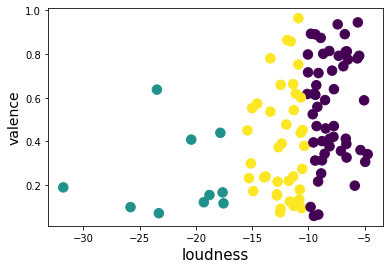

In [0]:
 
plt.scatter(X[:,1], X[:, 3], s=90, c=labels.astype(np.float), alpha=9)
plt.xlabel('loudness', fontsize=15)
plt.ylabel('valence', fontsize=14)

plt.show()

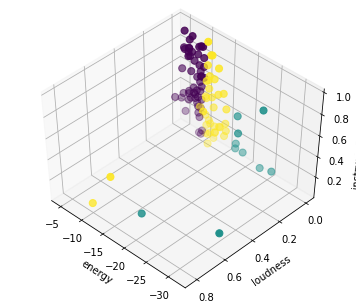

In [0]:
from mpl_toolkits.mplot3d import Axes3D 




fig = plt.figure(1, figsize=(5, 4))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('energy')
ax.set_ylabel('loudness')
ax.set_zlabel('instrumentalness')

ax.scatter(X[:, 1], X[:, 2], X[:, 3], s=50, c= labels.astype(np.float))

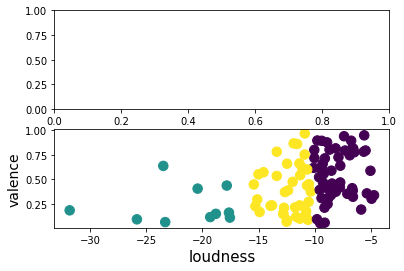

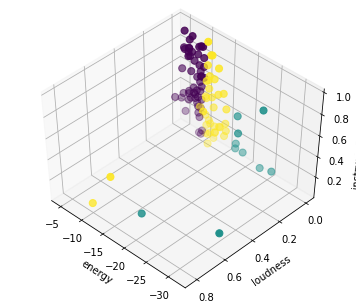

In [0]:
fig, axs = plt.subplots(2)
plt.scatter(X[:,1], X[:, 3], s=90, c=labels.astype(np.float), alpha=9)
plt.xlabel('loudness', fontsize=15)
plt.ylabel('valence', fontsize=14)
plt.show()

fig = plt.figure(1, figsize=(5, 4))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('energy')
ax.set_ylabel('loudness')
ax.set_zlabel('instrumentalness')

ax.scatter(X[:, 1], X[:, 2], X[:, 3], s=50, c= labels.astype(np.float))


